In [18]:
#importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


The below column reference:

- step: represents a unit of time where 1 step equals 1 hour
- type: type of online transaction
- amount: the amount of the transaction
- nameOrig: customer starting the transaction
- oldbalanceOrg: balance before the transaction
- newbalanceOrig: balance after the transaction
- nameDest: recipient of the transaction
- oldbalanceDest: initial balance of recipient before the transaction
- newbalanceDest: the new balance of recipient after the transaction
- isFraud: fraud transaction

In [19]:
data = pd.read_csv("C:\\Users\\HAI\\Downloads\\pay.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Study and preparing data

In [20]:
data.shape

(6362620, 11)

In [21]:
data.duplicated().sum()

0

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [23]:
#Cheking for Null values

data.isnull().sum()  #does not have any null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [24]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# type of transaction present in Dataset

C:\Users\HAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='type', ylabel='count'>

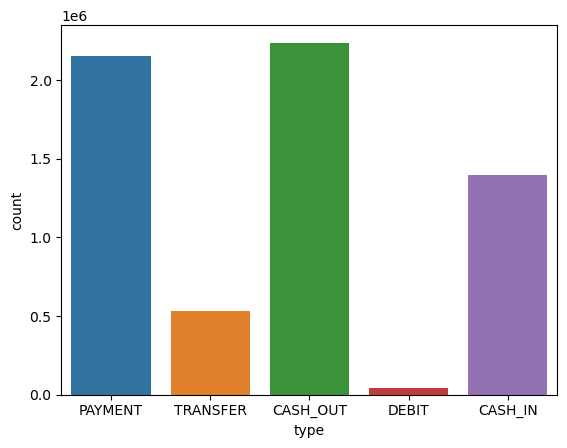

In [25]:
sns.countplot(data['type'])

In [26]:
type_transaction = data["type"].value_counts()
transaction = type_transaction.index
quantity = type_transaction.values

# plotting pie chart
fig = px.pie(data,
            values = quantity,
            names = transaction, 
            hole = 0.4,
            title = "Distribution of Transaction Type")
fig.show()

# Checking for co relataion between the features with isFraud column

In [10]:
corr = data.corr()
corr["isFraud"].sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

# transform the categorical features into numerical.

In [11]:
data["type"] = data["type"].map({"CASH_OUT": 1, 
                                 "PAYMENT": 2, 
                                 "CASH_IN": 3, 
                                 "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


# Online Payments Fraud Detection Model

In [12]:
# CLassification model

In [13]:
# Splitting the data 

from sklearn.model_selection import train_test_split
x = np.array(data[["type","amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data["isFraud"])
y


array(['No Fraud', 'No Fraud', 'Fraud', ..., 'Fraud', 'Fraud', 'Fraud'],
      dtype=object)

In [15]:
# Training the data

    # using Decision tree classifier
    # fit the training data in model
    
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 42)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
print('accuracay_score:%2f'%(accuracy_score(y_test,pred)*100))
print('....................Classification_report......................')
print(classification_report(y_test,pred))
print ('......................confusion_matrix........................')
df = pd.DataFrame(confusion_matrix(y_test,pred),index = (0,1),columns = (0,1))
df



accuracay_score:99.969006
....................Classification_report......................
              precision    recall  f1-score   support

       Fraud       0.89      0.87      0.88      2045
    No Fraud       1.00      1.00      1.00   1588610

    accuracy                           1.00   1590655
   macro avg       0.94      0.93      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655

......................confusion_matrix........................


,0,1
0,1775,270
1,223,1588387


In [16]:
# Classifying the transaction by feeding input

# Features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[1, 10000, 5000, 100]])
print(model.predict(features))

['No Fraud']
